## Learning rate schedule

In [1]:
import numpy as np
import sympy as sy
from sympy import Symbol
from sympy.tensor.array import Array
from matplotlib import pyplot as plt

In [2]:
def df_p(fun, x):
    return np.double(fun.subs([(vx[i], x[i]) for i in range(len(vx))]))
    
vx = [Symbol('x' + str(i)) for i in range(2)]

# функция "Птицы"
f = -sy.sin(vx[0])*sy.exp((1 - sy.cos(vx[1]))**2) - sy.cos(vx[1])*sy.exp((1 - sy.sin(vx[0]))**2) - (vx[0] - vx[1])**2
# символьный градиент
df = Array([sy.diff(f, _) for _ in vx])

In [3]:
# начальные параметры
xn = np.array([2., 1.])
lr=1e-1
lr_min=lr * 1e-3
t = 0    
res = [xn]

def learning_rate_schedule(t): # шаг спуска
    return lr / (t + 1)

while learning_rate_schedule(t) > lr_min: # достигнут минимально возможный шаг
    xn = xn - learning_rate_schedule(t) * df_p(df, xn)
    t += 1
    res.append(xn)

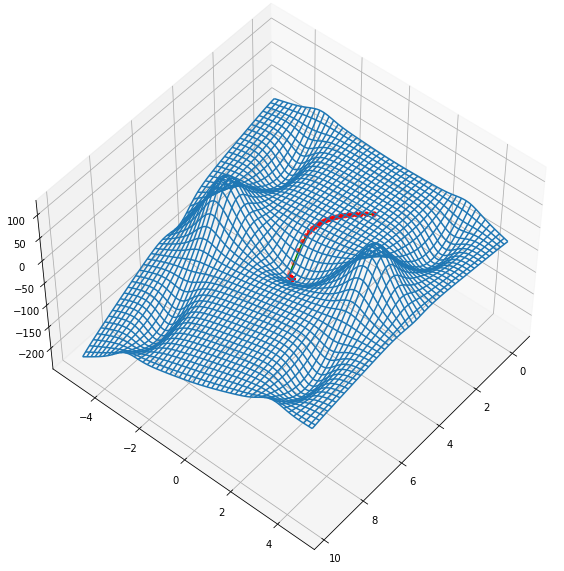

In [4]:
path = np.array(res)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

surface = lambda x: -np.sin(x[0])*np.exp((1 - np.cos(x[1]))**2) - np.cos(x[1])*np.exp((1 - np.sin(x[0]))**2) - (x[0] - x[1])**2

X = np.linspace(xn[0]-5, xn[0]+5, 200)
Y = np.linspace(xn[1]-5, xn[1]+5, 200)
X, Y = np.meshgrid(X, Y)
Z = surface([X,Y])
ax.plot_wireframe(X, Y, Z)

F = surface([path.T[0], path.T[1]])
ax.plot(path.T[0], path.T[1], F, zdir='z', color='g')
ax.scatter(path.T[0], path.T[1], F, zdir='z', color='r')
ax.view_init(50, 40)

## AdaGrad

In [5]:
xn = np.array([-0.6, 2.5])
lr=4e-1
lr_min=lr * 1e-16
t = 1
state_sum = 0
e = 1e-8
res = [xn]
        
while learning_rate_schedule(t) > lr_min:
    state_sum = state_sum + df_p(df, xn) ** 2
    xn = xn - lr * df_p(df, xn) / (np.sqrt(state_sum) + e)
    
    lr = lr/(1 + (t - 1)*0.001)
    t += 1 
    res.append(xn)

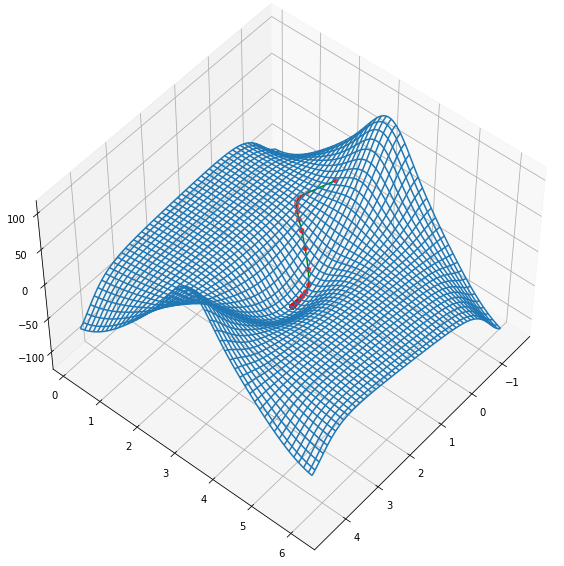

In [6]:
path = np.array(res)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

surface = lambda x: -np.sin(x[0])*np.exp((1 - np.cos(x[1]))**2) - np.cos(x[1])*np.exp((1 - np.sin(x[0]))**2) - (x[0] - x[1])**2

X = np.linspace(xn[0]-3, xn[0]+3, 200)
Y = np.linspace(xn[1]-3, xn[1]+3, 200)
X, Y = np.meshgrid(X, Y)
Z = surface([X,Y])
ax.plot_wireframe(X, Y, Z)

F = surface([path.T[0], path.T[1]])
ax.plot(path.T[0], path.T[1], F, zdir='z', color='g')
ax.scatter(path.T[0], path.T[1], F, zdir='z', color='r')
ax.view_init(50, 40)